In [228]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

### Corrigindo para diferentes escalas

In [229]:
df = pd.DataFrame({'Altura':[1.6,2.0,1.6],'Peso':[50,50,52],'Cor':['b','r','g']})

In [230]:
df

,Altura,Peso,Cor
0,1.6,50,b
1,2.0,50,r
2,1.6,52,g


Qual amostra/indivíduo é o mais distante, ou diferente? Nossa intuição diz que é o indivíduo número 1 (vermelho), que é muito mais alto que os outros, e todos os outros tem quase o mesmo peso
<br> Quando geramos um gráfico, eles podem aprecer equi-distantes e nos induzir ao erro

<AxesSubplot:xlabel='Altura', ylabel='Peso'>

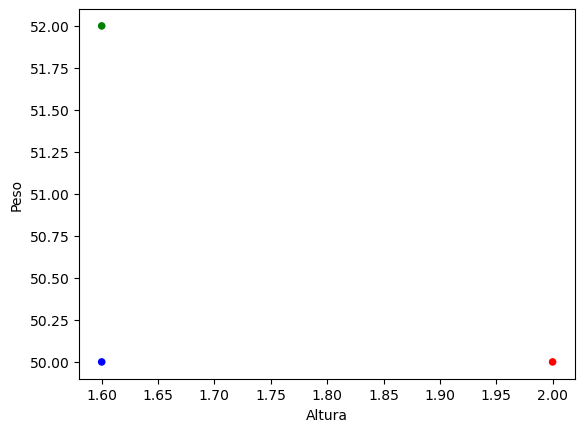

In [231]:
df.plot.scatter('Altura','Peso',color=df['Cor'])

Se consideramos que cada ponto é uma amostra ou ponto nessa imagem, podemos medir a similaridade ou diferenças em função da distância entre os pontos

Podemos medir essa distância como o tamanho da linha reta que separa os dois pontos (i.e. distância euclidiana), que é medida da seguinte forma (considerando vários atributos {X, Y, ... N}:
<br>$d(a,b) = \sqrt{(X_a - X_b)^2 + (Y_a - Y_b)^2 + ... + (N_a - N_b)^2} $

<br>Em duas dimensões já conhecemos essa fórmula, ela vem do teorema de Pitágoras (ver abaixo), só foi extendida para aceitar mais que 2 dimensões

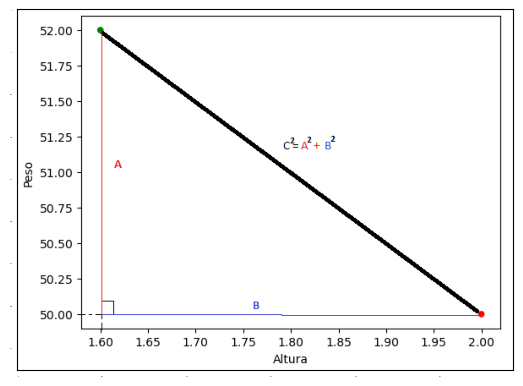

In [232]:
fig, ax = plt.subplots(nrows=1,ncols=1)
img = np.asarray(Image.open('Euclidiana.png'))
ax.tick_params(which = 'both', size = 0, labelsize = 0)
ax.imshow(img)
print('')

Vamos gerar esse gráfico em escala para poder medir as distâncias entre os pontos, e verificar qual ponto é o outlier

In [233]:
df

,Altura,Peso,Cor
0,1.6,50,b
1,2.0,50,r
2,1.6,52,g


In [234]:
d = []
for i in [0,1,2]:
    d.append([])
    for j in [0,1,2]:
        distAlt = (df.loc[i]['Altura'] - df.loc[j]['Altura'])**2
        distPeso = (df.loc[i]['Peso'] - df.loc[j]['Peso'])**2
        distij = np.sqrt(distAlt + distPeso)
        d[i].append(distij)
distDF = pd.DataFrame(d, index=df['Cor'].head(3), columns=df['Cor'].head(3))

In [235]:
distDF

Cor,b,r,g
Cor,,,
b,0.0,0.400000,2.000000
r,0.4,0.000000,2.039608
g,2.0,2.039608,0.000000


Notamos que Vermelho e Azul são bem próximos na verdade e o diferentão é o Verde, por que isso acontece? A imagem abaixo coloca esses pontos no espaço, deixando os dois eixos na mesma escala (3 pontos de diferença)

<AxesSubplot:xlabel='Altura', ylabel='Peso'>

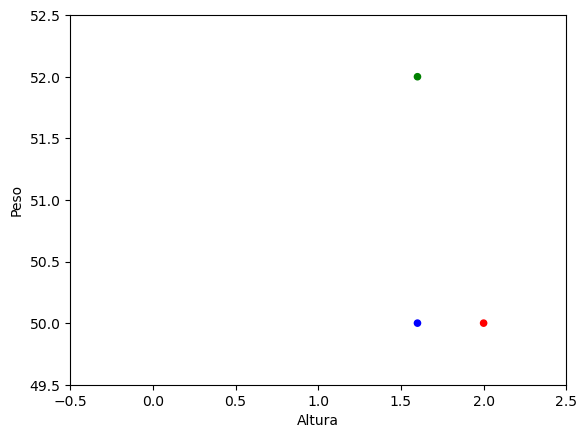

In [236]:
df.head(3).plot.scatter('Altura','Peso',color=df.head(3)['Cor'],ylim=(49.5,52.5),xlim=(-0.5,2.5))

Para que a distância entre as amostras siga a nossa intuição, precisamos reduzir a escala da altura, de modo que uma pequena mudança na **altura** seja comparável com uma pequena mudança no **peso**

Utilizaremos as outras amostras para gerar uma escala de 0 a 1, 0 indica a menor amostra naquele atributo, e 1 a maior; Notem que com essa transformação, deixamos de comparar pessoas de tal altura com tal altura e começamos a comparar pessoas mais altas ou mais baixas, com pessoas mais altas ou mais baixas, nossa medida fica relativa à nossa amostra

Faremos isso por meio da normalização MinMax, ela recebe esse nome, pois os valores mínimos serão atribuídos ao valor 0 e os valores máximos ao valor 1. Considerando que cada atributo $X$ é um conjunto de valores $x_i$, normalizamos esse atributo com o seguinte cálculo:
<br>$x_i^{novo} = \frac{x_i - min\{X\}}{max\{X\} - min\{X\}}$

Para exemplificar vamos supor X = {1,2,4}
min{X} = 1
max{X} = 4
Nossos $x_i$ novos são:<br><br>
$\frac{1 - 1}{4 - 1} = \frac{0}{3} = 0$<br><br>
$\frac{2 - 1}{4 - 1} = \frac{1}{3} = 0.33$<br><br>
$\frac{4 - 1}{4 - 1} = \frac{3}{3} = 1$<br><br>
$X^{novo}$ = {0, 0.33, 1}

Vamos aplicar a fórmula em todas as colunas do nossos dados. Considerando que a altura varia de 0.5 a 2.3 e o peso de 30 a 110Kg

In [237]:
mins = pd.Series([0.5,30],index=['Altura','Peso'])
maxs = pd.Series([2.3,110],index=['Altura','Peso'])
dfNorm = (df[['Altura','Peso']] - mins)/(maxs - mins)
dfNorm = pd.concat([dfNorm,df['Cor']],axis=1) #colocando a coluna de cores de volta para podermos plotar
dfNorm

,Altura,Peso,Cor
0,0.611111,0.250,b
1,0.833333,0.250,r
2,0.611111,0.275,g


Vamos plotar os 3 pontos novamente para mostrar que agora as distâncias seguem nossa intuição de que o ponto vermelho é o mais distinto entre os pontos vermelho, verde e azul

<AxesSubplot:xlabel='Altura', ylabel='Peso'>

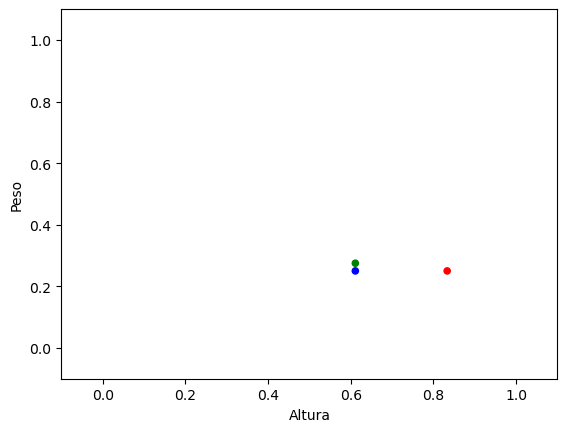

In [238]:
dfNorm.plot.scatter('Altura','Peso',color=dfNorm.head(3)['Cor'],xlim=(-0.1,1.1),ylim=(-0.1,1.1))

Nem sempre teremos um intervalo claro para decidir os limiares de mínimo e máximo; mesmo no nosso exemplo utilizamos pontos arbitrários, afinal existem pessoas com menos de meio metro ou mais de 110Kg. Na maioria das vezes utilizamos os máximos e mínimos da própria amostra. Vamos ver outro exemplo, adicionamos novos pontos, que serão coloridos de preto

In [239]:
df2 = pd.DataFrame({'Altura':[1.6,2.0,1.6,1.5,1.6,1.8,1.7],'Peso':[50,50,52,50,55,65,63],'Cor':['b','r','g','k','k','k','k']})
df2

,Altura,Peso,Cor
0,1.6,50,b
1,2.0,50,r
2,1.6,52,g
3,1.5,50,k
4,1.6,55,k
5,1.8,65,k
6,1.7,63,k


<AxesSubplot:xlabel='Altura', ylabel='Peso'>

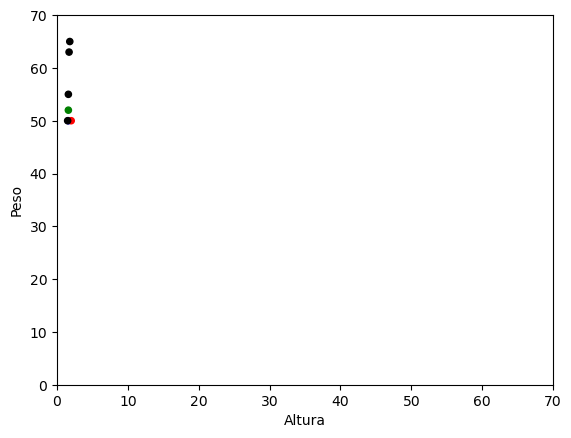

In [240]:
#Plotando automáticamente, o plotter já ajusta as escalar para o gráfico ficar visualmente agradável
#df2.plot.scatter('Altura','Peso',color=df2['Cor'])

#Plotando em escala
df2.plot.scatter('Altura','Peso',color=df2['Cor'],xlim=(0,70), ylim=(0,70))

<AxesSubplot:xlabel='Altura', ylabel='Peso'>

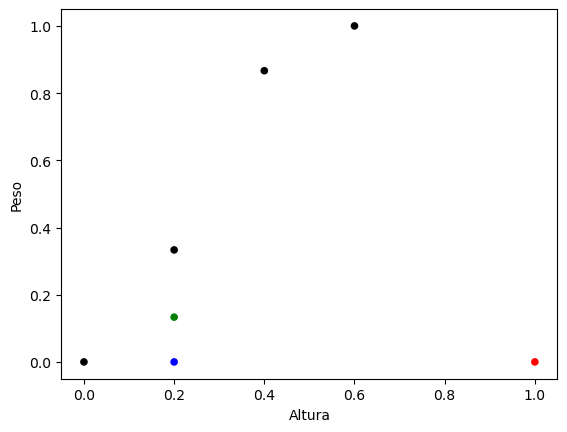

In [241]:
df2Norm = (df2[['Altura','Peso']] - df2[['Altura','Peso']].min())/(df2[['Altura','Peso']].max()-df2[['Altura','Peso']].min())
df2Norm = pd.concat([df2Norm,df2['Cor']],axis=1)
df2Norm.plot.scatter('Altura','Peso',color=df2Norm['Cor'])

Olhando com todos os pontos, o antes e depois

Text(0.5, 1.0, 'Dados Normalizados')

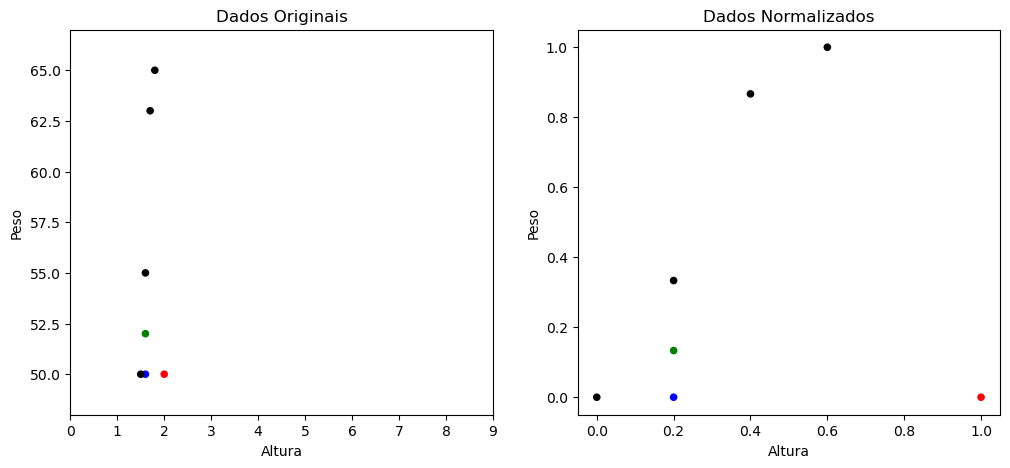

In [242]:
plt.figure(figsize=(12, 5))
G = gridspec.GridSpec(1, 2)

#Plotando antes de transformar os dados, eixos na mesma escala (9 pontos)
axOriginal = plt.subplot(G[0])
df2.plot.scatter('Altura','Peso', color=df2['Cor'],ylim=(48,67),xlim=(0,9), ax = axOriginal)
axOriginal.set_title('Dados Originais')

#Plotando depois da normalização
axNorm = plt.subplot(G[1])
df2Norm.plot.scatter('Altura','Peso', color=df2Norm['Cor'], ax = axNorm)
axNorm.set_title('Dados Normalizados')

**Discussões e Reflexões:**

- Sempre que precisarmos medir distâncias, direta ou indiretamente, essa diferença em escala será relevante; devemos sempre pensar se nossa base de dados precisa ser normalizada
- O que acontecerá caso uma nova amostra seja inserida nessa base? Se o novo ponto for maior que os outros, terá valores maiores do que 1, ainda assim a base segue normalizada; desde que as novas amostras sejam da mesma natureza das colhidas anteriormente
- Mudamos a interpretação dos atributos ao normalizar, mas podemos reverter a base para seu estado original, desde que guardemos os máximos e mínimos utilizados para normalização, basta aplicar a função inversa à normalização; outra alternativa é usar o próprio dataframe original, com a informação obtida no normalizado


### Usando distâncias para encontrar grupos e outliers

In [243]:
df2['Cor']=['b','r','g','c','m', 'y', 'k']
df2Norm['Cor'] = ['b','r','g','c','m', 'y', 'k']
df2

,Altura,Peso,Cor
0,1.6,50,b
1,2.0,50,r
2,1.6,52,g
3,1.5,50,c
4,1.6,55,m
5,1.8,65,y
6,1.7,63,k


<AxesSubplot:xlabel='Altura', ylabel='Peso'>

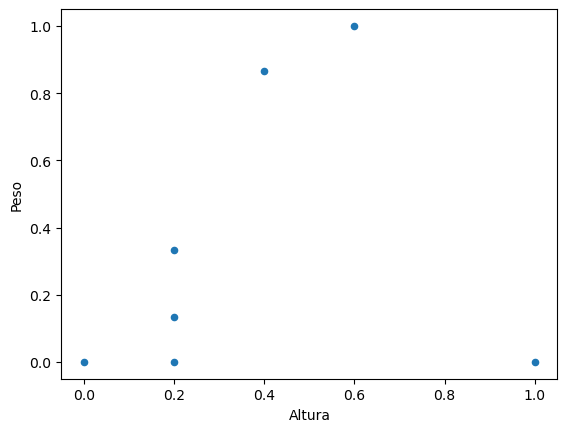

In [244]:
df2Norm.plot.scatter('Altura','Peso') #omitimos as cores deliberadamente

Utilizaremos um algoritmo chamado Single-Linkage. Ele gera hierarquias de grupos de amostras usando as distâncias entre elas. Vamos ver a hierarquia, irá facilitar o entendimento

In [245]:
df2Norm

,Altura,Peso,Cor
0,0.2,0.000000,b
1,1.0,0.000000,r
2,0.2,0.133333,g
3,0.0,0.000000,c
4,0.2,0.333333,m
5,0.6,1.000000,y
6,0.4,0.866667,k


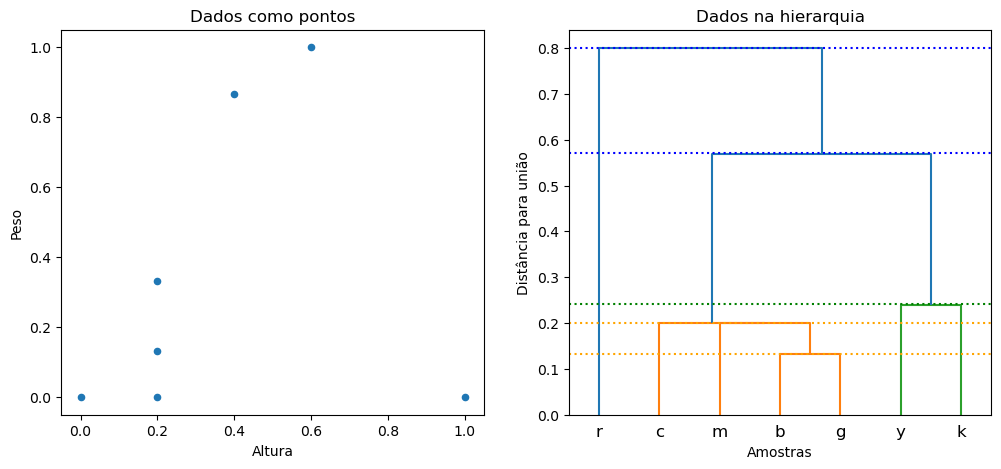

In [246]:
plt.figure(figsize=(12, 5))
G = gridspec.GridSpec(1, 2)

#Plotando dados normalizados
axPontos = plt.subplot(G[0])
df2Norm.plot.scatter('Altura','Peso', ax = axPontos) #omitindo as cores
#df2Norm.plot.scatter('Altura','Peso', color=df2Norm['Cor'],ax = axPontos) #Colorindo para verificar nossas conclusões
axPontos.set_title('Dados como pontos')

#Plotando hierarquia gerada pelo algoritmo
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(df2Norm[['Altura','Peso']], 'single', 'euclidean')

axHierarquia = plt.subplot(G[1])
dn = dendrogram(Z, labels=list(df2Norm['Cor']),ax=axHierarquia)
axHierarquia.hlines([0.1325,0.2,0.2415,0.570,0.8],xmin=0,xmax=75, linestyles='dotted', colors=['orange','orange','green','blue','blue'])
axHierarquia.set_title('Dados na hierarquia')
axHierarquia.set_xlabel('Amostras')
axHierarquia.set_ylabel('Distância para união')

plt.show()


Utilizamos a distãncia euclidiana como havíamos antes para juntar pontos. Notem que o pontos b(lue) e g(reen) se juntam em um nível/distância de aprox. 0.1325 (linha pontilhada laranja), isso indica que a distância entre eles é de 0.1325; logo depois vimos que c(yan), m(agenta) se unem com {b,g} num nível de 0.2 (linha pontilhada amarela superior), o que indica que algum dos pontos c ou m, está a uma distância de 0.2 para b ou g
<br><br> Outra coisa que é notável é que r(ed) só se mistura com algum grupo no nível 0.8 (linha pontilhada azul superior), indicando que precisa de tal distância para se juntar a **qualquer outra amostra**, essa hierarquia nos permite ver outliers facilmente, sob uma ótima diferente da que vimos anteriormente
<br><br> Conseguimos ter uma ideia geral de qual ponto é qual? Usando essa hierarquia? (descomentando a linha, podemos revelar as cores)<br>**#df2Norm.plot.scatter('Altura','Peso', color=df2Norm['Cor']) #Colorindo para verificar nossas conclusões)**

#### Sem normalizar
Sem normalizar essas distâncias estão todas distorcidas, e é preciso uma mudança muito drástica na altura para compensar pequenas diferenças no peso

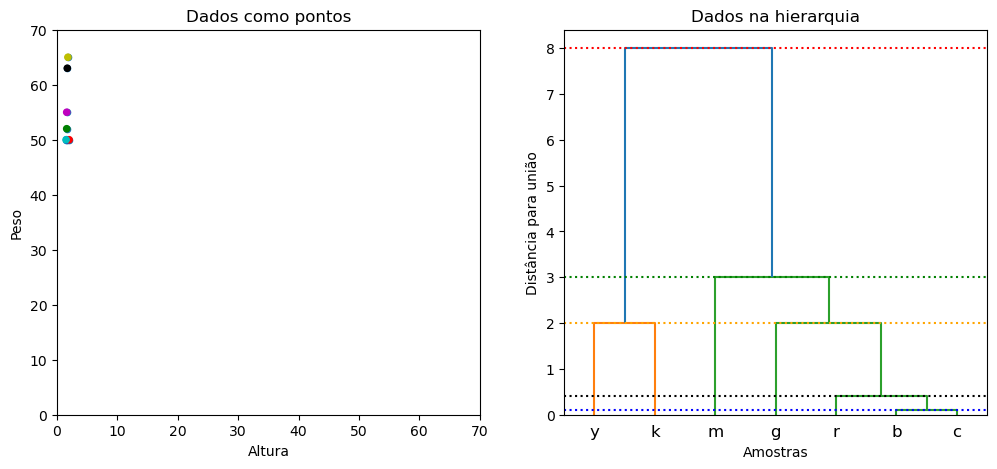

In [247]:
plt.figure(figsize=(12, 5))
G = gridspec.GridSpec(1, 2)

#Plotando dados originais
axPontos = plt.subplot(G[0])
df2.plot.scatter('Altura','Peso', ax = axPontos,xlim=(0,70),ylim=(0,70)) #omitindo cores
df2.plot.scatter('Altura','Peso', ax = axPontos,xlim=(0,70),ylim=(0,70), color=df2['Cor']) #mostrando as cores
axPontos.set_title('Dados como pontos')

#Plotando hierarquia gerada pelo algoritmo
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(df2[['Altura','Peso']], 'single', 'euclidean')

axHierarquia = plt.subplot(G[1])
dn = dendrogram(Z, labels=list(df2Norm['Cor']),ax=axHierarquia)
axHierarquia.hlines([2,0.1,3,0.400,8],xmin=0,xmax=75, linestyles='dotted', colors=['orange','blue','green','black','red'])
axHierarquia.set_title('Dados na hierarquia')
axHierarquia.set_xlabel('Amostras')
axHierarquia.set_ylabel('Distância para união')

plt.show()

**Discussões e reflexões**
- A hierarquia nos permite verificar em 2 dimensões a distribuição geral das amostras
- Normalizar é essencial quando temos diferenças muito grandes de escala, pois um atributo irá ter um impacto muito maior (mais significativo) que o outro no cálculo da distância
- Notem a diferença na hierarquia ao não normalizar, o outlier r(ed) se tornou um ponto bem próximo aos outros
- Com a hirarquia gerada, podemos notar se temos grupos de amostras?

#### Uma (pequena) dose de realidade
Vamos ver como ficaria a base Iris (4D) usando esse mesmo algoritmo para visualização

In [248]:
irisdb = pd.read_csv("IrisColored.csv")
#Ainda que as escalas na base de dados iris sejam similares entre os atributos, vamos normalizar por garantia
irisdbNorm = irisdb.drop('Subespécie',axis=1)
irisdbNorm = (irisdbNorm - irisdbNorm.min())/(irisdbNorm.max() - irisdbNorm.min())
irisdbNorm = pd.concat([irisdbNorm, irisdb['Subespécie']],axis=1)

#irisdbNorm
irisdb

,Comprimento Sépala (cm),Largura Sépala (cm),Comprimento Pétala (cm),Largura Pétala (cm),Subespécie
0,5.1,3.5,1.4,0.2,b
1,4.9,3.0,1.4,0.2,b
2,4.7,3.2,1.3,0.2,b
3,4.6,3.1,1.5,0.2,b
4,5.0,3.6,1.4,0.2,b
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,r
146,6.3,2.5,5.0,1.9,r
147,6.5,3.0,5.2,2.0,r
148,6.2,3.4,5.4,2.3,r


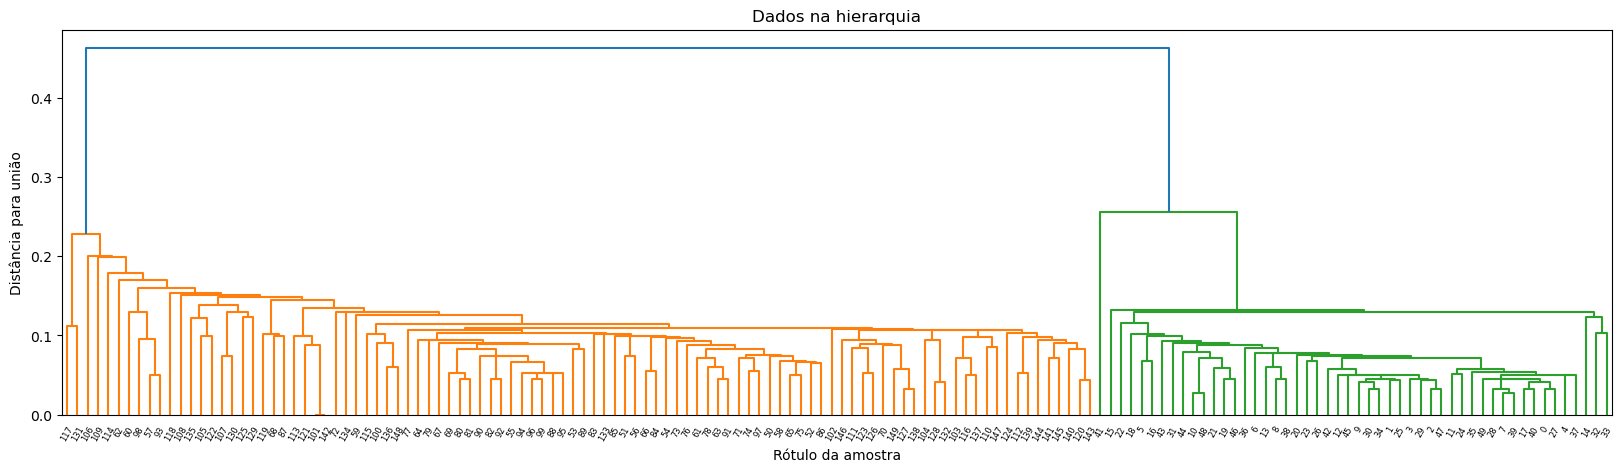

In [254]:
#Plotando hierarquia gerada pelo algoritmo
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(irisdbNorm.drop('Subespécie',axis=1), 'single', 'euclidean') #base Normalizada
#Z = linkage(irisdb.drop('Subespécie',axis=1), 'single', 'euclidean') #base não normalizada


plt.figure(figsize=(20, 5))
G = gridspec.GridSpec(1, 1)
ax = plt.subplot(G[0])

dn = dendrogram(Z,ax=ax, leaf_font_size=6, leaf_rotation=60) #Sem rótulos
#dn = dendrogram(Z, labels=list(irisdb['Subespécie']),ax=ax, leaf_font_size=12, leaf_rotation=0) #Com rótulos, como as bases estão com índices na mesma ordem não é problema deixar irisdb['Subespécie'], mesmo usando a normalizada, os valores serão idênticos
ax.set_title('Dados na hierarquia')
ax.set_xlabel('Rótulo da amostra')
ax.set_ylabel('Distância para união')
#plt.savefig('Iris.png')
plt.show()

**Discussões e reflexões:**
- Não conseguimos plotar a nuvem de pontos das 4 dimensões, mas pela hierarquia conseguimos ter uma noção geral da distribuição das amostras, mesmo sem poder visualizar no espaço original
- Ainda nesse curso, aprenderemos um método de projeção para permitir projetar muitas dimensões em um espaço de 2 ou 3 dimensões que seja similar ao original; perderemos um pouco de informação, mas vai nos ajudar a visualizar também